In [1]:
!pip install kaggle


In [2]:
!pip install kagglehub


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhaveshmittal/melanoma-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SHOVON HALDER\.cache\kagglehub\datasets\bhaveshmittal\melanoma-cancer-dataset\versions\1


In [4]:
import numpy as np
import pandas as pd
import os

# Define the absolute paths to the malignant and benign directories
malignant_dir = r'C:\Users\SHOVON HALDER\.cache\kagglehub\datasets\bhaveshmittal\melanoma-cancer-dataset\versions\1\train\Malignant'
benign_dir = r'C:\Users\SHOVON HALDER\.cache\kagglehub\datasets\bhaveshmittal\melanoma-cancer-dataset\versions\1\train\Benign'

def load_image_paths_labels(malignant_dir, benign_dir):
    # Load malignant images
    malignant_images = [(os.path.join(malignant_dir, img), 'Malignant') 
                        for img in os.listdir(malignant_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
    # Load benign images
    benign_images = [(os.path.join(benign_dir, img), 'Benign') 
                     for img in os.listdir(benign_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
    # Combine both lists
    images_labels = malignant_images + benign_images
    return images_labels

# Load the image paths and labels into a list
image_data = load_image_paths_labels(malignant_dir, benign_dir)

# Create a DataFrame from the list
df = pd.DataFrame(image_data, columns=['image_path', 'label'])

# Display the first few rows of the DataFrame
print(df.head())


                                          image_path      label
0  C:\Users\SHOVON HALDER\.cache\kagglehub\datase...  Malignant
1  C:\Users\SHOVON HALDER\.cache\kagglehub\datase...  Malignant
2  C:\Users\SHOVON HALDER\.cache\kagglehub\datase...  Malignant
3  C:\Users\SHOVON HALDER\.cache\kagglehub\datase...  Malignant
4  C:\Users\SHOVON HALDER\.cache\kagglehub\datase...  Malignant


In [5]:
df.tail()

,image_path,label
11874,C:\Users\SHOVON HALDER\.cache\kagglehub\datase...,Benign
11875,C:\Users\SHOVON HALDER\.cache\kagglehub\datase...,Benign
11876,C:\Users\SHOVON HALDER\.cache\kagglehub\datase...,Benign
11877,C:\Users\SHOVON HALDER\.cache\kagglehub\datase...,Benign
11878,C:\Users\SHOVON HALDER\.cache\kagglehub\datase...,Benign


In [6]:
df.shape

(11879, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [10]:
df['label'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [11]:
df['label'].value_counts()

label
Benign       6289
Malignant    5590
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

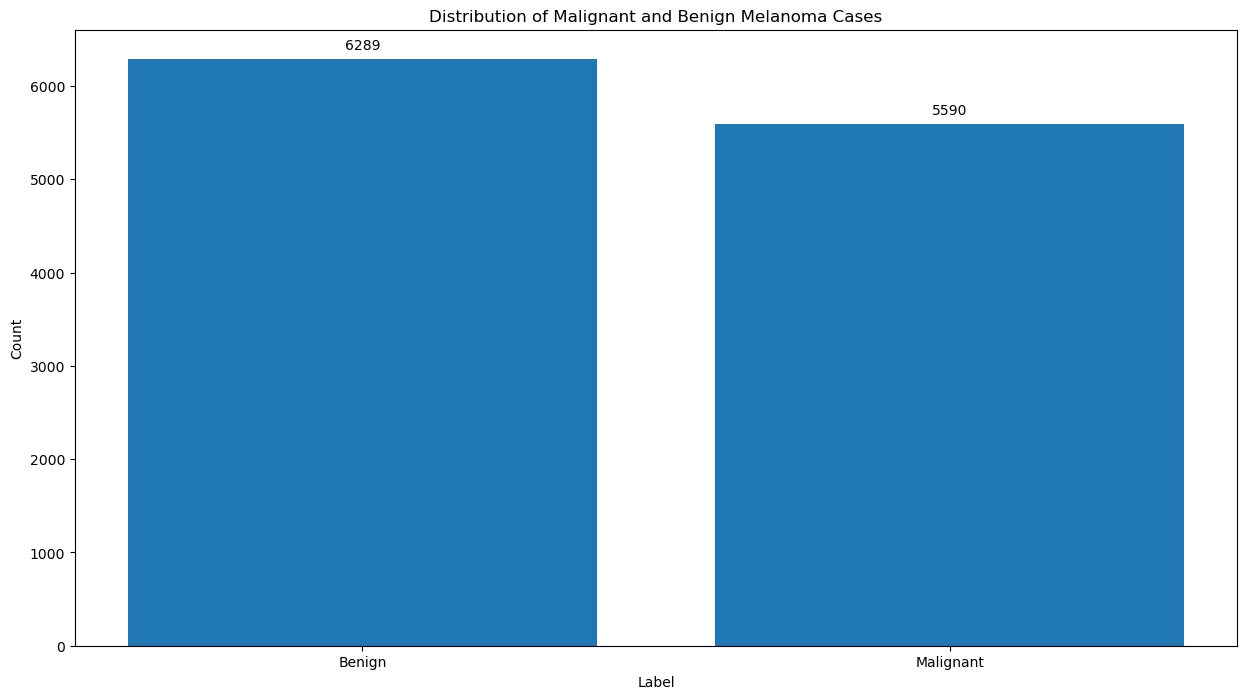

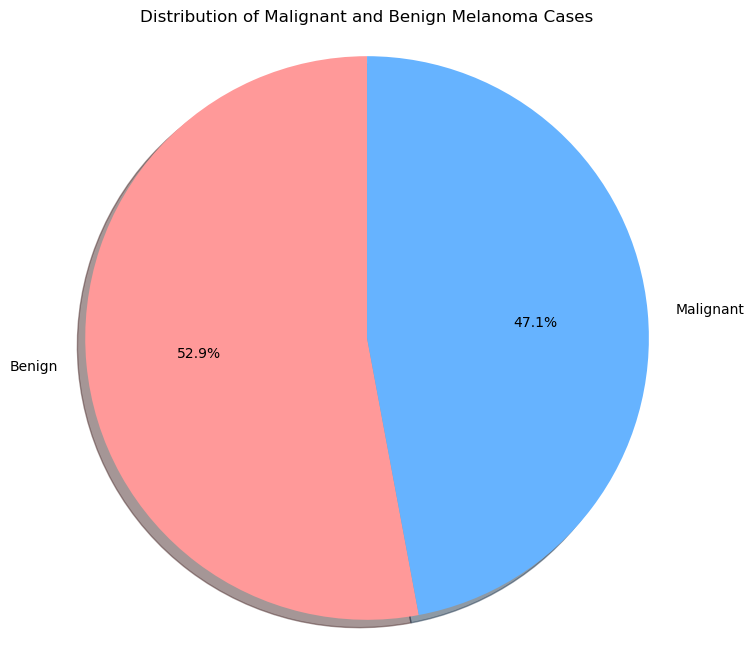

In [14]:
# Bar Chart
plt.figure(figsize=(15,8))
# Create and capture the bar plot
ax = plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)

# Add value labels on top of each bar
for p in ax:  # Note: we iterate directly over ax since it's a container of patches
    height = p.get_height()
    plt.annotate(f'{height}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 10),
                textcoords='offset points', ha='center', va='center')

plt.title('Distribution of Malignant and Benign Melanoma Cases')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()

# Pie Chart
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff'],
        shadow=True)

plt.axis('equal')
plt.title('Distribution of Malignant and Benign Melanoma Cases')
plt.show()

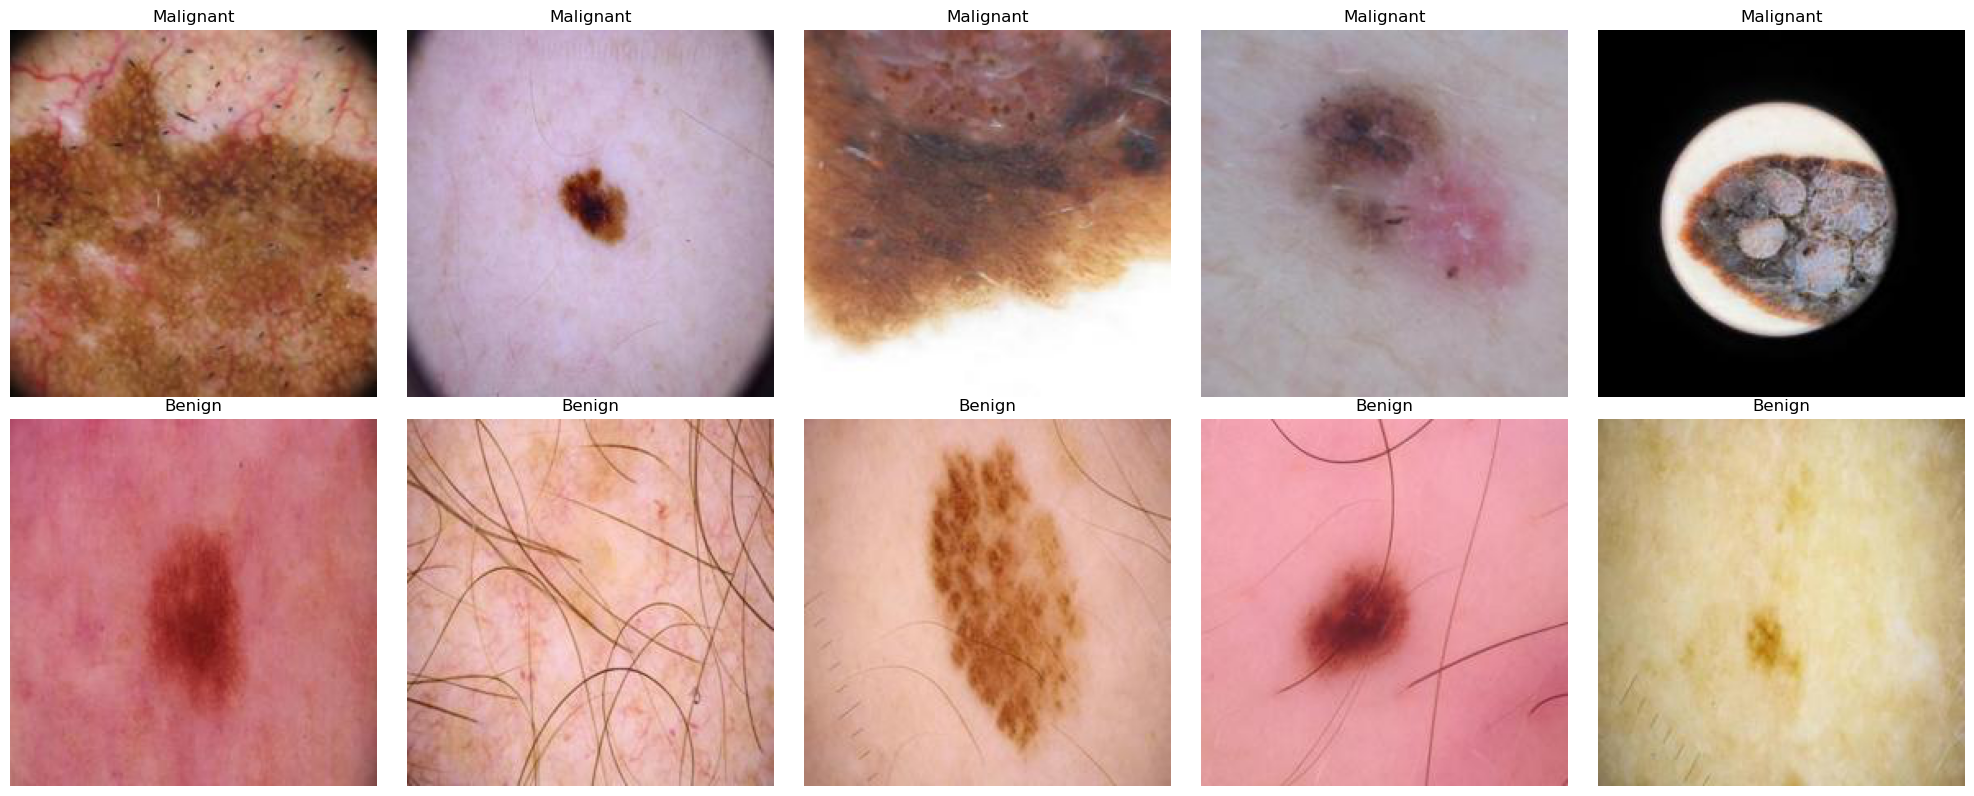

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
from itertools import zip_longest

# Get lists of image files
malignant_images = os.listdir(malignant_dir)
benign_images = os.listdir(benign_dir)

# Randomly sample 5 images from each category
malignant_sample = np.random.choice(malignant_images, 5, replace=False)
benign_sample = np.random.choice(benign_images, 5, replace=False)

# Create a subplot with 2 rows, 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Plot malignant samples
for ax, img_name in zip(axes[0], malignant_sample):
    img_path = os.path.join(malignant_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Malignant')

# Plot benign samples
for ax, img_name in zip(axes[1], benign_sample):
    img_path = os.path.join(benign_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Benign')

plt.tight_layout()
plt.show()

In [16]:
!pip install imbalanced-learn


In [17]:
pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1


Note: you may need to restart the kernel to use updated packages.


In [18]:

pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [19]:
# First, uninstall existing imbalanced-learn
!pip uninstall -y imbalanced-learn

# Then install the specific version that works well
!pip install imbalanced-learn==0.10.1

# Also ensure scikit-learn is at a compatible version
!pip install scikit-learn==1.2.2

# Restart your kernel after installation

Found existing installation: imbalanced-learn 0.12.4
Uninstalling imbalanced-learn-0.12.4:
  Successfully uninstalled imbalanced-learn-0.12.4
  Obtaining dependency information for imbalanced-learn==0.10.1 from https://files.pythonhosted.org/packages/11/80/911e581a4fc973179e3a48c1272435aa09cce21c12af122c3886d3d35cb5/imbalanced_learn-0.10.1-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [20]:
!pip install --user imbalanced-learn==0.10.1
!pip install --user scikit-learn==1.2.2

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())



Class distribution after oversampling:
label
Malignant    6289
Benign       6289
Name: count, dtype: int64


In [22]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

In [23]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [24]:
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings("ignore")
print('check')


check


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Splitting data into train, validation, and test sets
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

# Image data generator settings
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)
train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")






Found 10062 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.
Using CPU


In [27]:
def create_cnn_model(input_shape):
    model=models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

input_shape = (224, 224, 3)

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,600,385 (9.92 MB)

 Trainable params: 2,600,385 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 179s 284ms/step - accuracy: 0.8446 - loss: 0.3597 - val_accuracy: 0.8529 - val_loss: 0.3365
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 175s 278ms/step - accuracy: 0.8630 - loss: 0.3165 - val_accuracy: 0.8601 - val_loss: 0.3286
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 297ms/step - accuracy: 0.8765 - loss: 0.2908 - val_accuracy: 0.8672 - val_loss: 0.3183
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 182s 289ms/step - accuracy: 0.8827 - loss: 0.2687 - val_accuracy: 0.8553 - val_loss: 0.3721
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 298ms/step - accuracy: 0.8951 - loss: 0.2519 - val_accuracy: 0.8712 - val_loss: 0.3405
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 191s 304ms/step - accuracy: 0.8950 - loss: 0.2472 - val_accuracy: 0.8728 - val_loss: 0.3292
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 297ms/step - accuracy: 0.9060 - loss: 0.2237 - val_accuracy: 0.8760 - val_loss: 0.3483
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 184s 292ms/step - accuracy: 0.9157 -

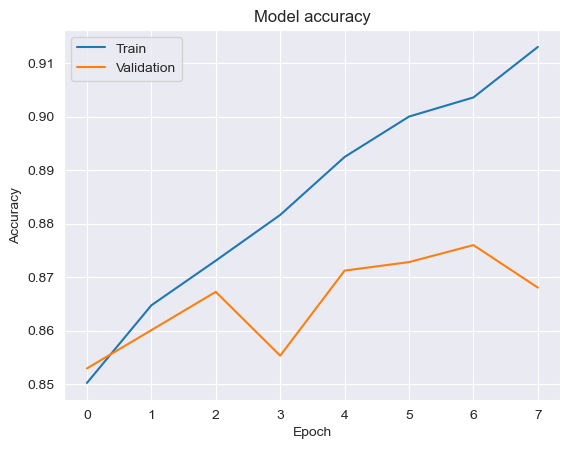

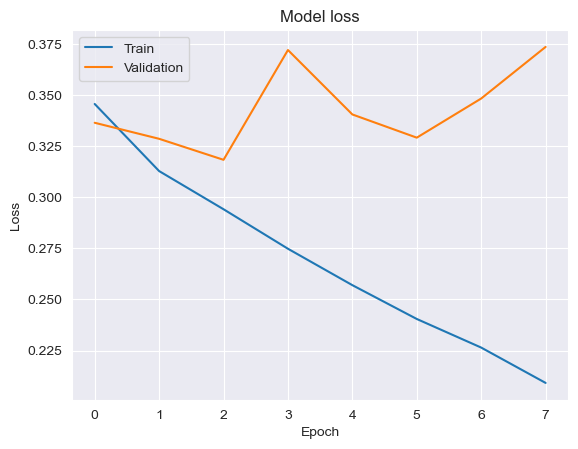

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [32]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_labels = (predictions > 0.5).astype(int).flatten()

from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

conf_matrix = confusion_matrix(test_labels, predicted_labels)


79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step
              precision    recall  f1-score   support

      Benign       0.87      0.84      0.86       629
   Malignant       0.85      0.88      0.86       629

    accuracy                           0.86      1258
   macro avg       0.86      0.86      0.86      1258
weighted avg       0.86      0.86      0.86      1258



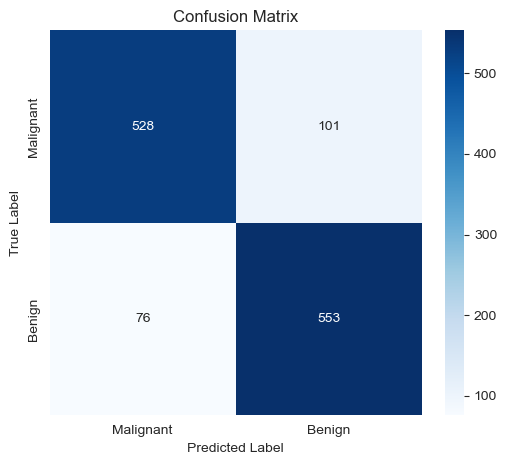

In [33]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
